In [1]:
import numpy as np
import pandas as pd
from statsbombpy import sb
import networkx as nx
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch
import statistics as stats

In [ ]:
#Import competition data to find season we are interested in: La Liga - 2020/2021
competition_df = sb.competitions()
season = competition_df[ (competition_df.competition_name == 'La Liga') & (competition_df.season_name == '2020/2021') ]

In [ ]:
#Find the matches where Barcelona played. Could be as home team or away team
season_matches = sb.matches(competition_id = season.competition_id.iloc[0],season_id = season.season_id.iloc[0])
barcelona_matches = season_matches[ (season_matches.home_team == 'Barcelona') | ( season_matches.away_team == 'Barcelona') ]
barcelona_matches.match_id[1]

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [ ]:
# Function to plot a pie chart of shots,passes and dribbles throughout a season. Also returns the number of each category
def player_pie_chart(matches_df,player_name):
    # Inputs are:
    #           a pandas data frame of matches a player is involved in.
    #           the full name of the player in question


    # Creating empty data frame for the events for the player
    season_player_events = pd.DataFrame()


    # Creating counters for each stat
    pass_count = 0
    shot_count = 0
    carry_count = 0

    # iterating through the dataframe of matches and adding player events to season_player_events 
    for match_id_iter in matches_df.match_id[:]:
        match_iter = sb.events(match_id=match_id_iter)
        player_events = match_iter[(match_iter.player == player_name)]
        season_player_events = pd.concat([season_player_events, player_events])


    # iterating through the rows in the now complete season_player_events and adding results to counter
    for i,row in season_player_events.iterrows():
        if row.type == 'Pass':
            pass_count+=1
        if row.type == 'Shot':
            shot_count+=1
        if row.type == 'Carry':
            carry_count+=1


    # Plotting the pie chart
    labels = ['Pass','Shot','Carry']
    sizes = [pass_count,shot_count,carry_count]

    plt.pie(sizes, autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(sizes):.0f} events)',
            shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels)
    plt.title('Split of passes, shots and carries for ' + player_name+ '\n' +' in the 2020/21 La Liga Season')
    plt.savefig(player_name+'_pie.png')
    plt.show()
    return sizes
  

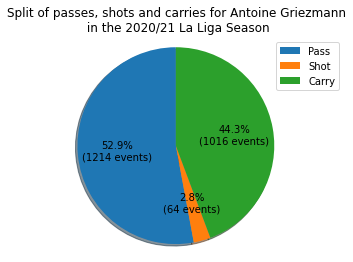

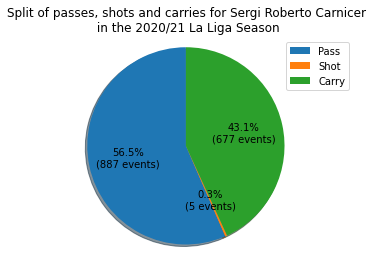

In [ ]:
player_pie_chart(barcelona_matches,'Antoine Griezmann')
player_pie_chart(barcelona_matches, 'Sergi Roberto Carnicer')


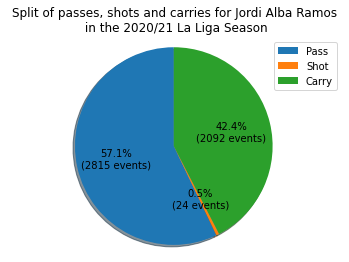

[2815, 24, 2092]


In [ ]:
print(player_pie_chart(barcelona_matches,'Jordi Alba Ramos'))

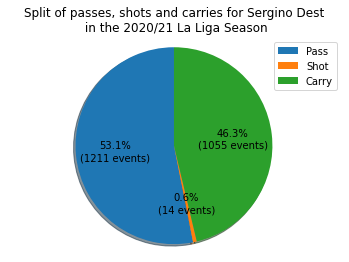

[1211, 14, 1055]


In [ ]:
print(player_pie_chart(barcelona_matches,'Sergino Dest'))